In [10]:
#colab

# from google.colab import drive
# drive.mount('/content/gdrive')

# import sys
# sys.path.append('/content/gdrive/MyDrive/ajou_ribs/img')

import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')

---
# 수학과 201521139 이재학
### Keywords : Frechet distance, interpoint distance
---
### 진행 방식 참고:
<img src="허권논문.jpg" width="300px" height="300px">


# Contents
- 논문소개   
- 배경지식
  - Hausdorff distance
  - frechet distance
  - discrete frechet distance
- 활용
  - 다차원프레셰 거리 기반 종단자료 군집분석(MFKmL)
  - 대립생성망의 성능 비교에 대한 연구 (FID)
  - 이산 프레셰 거리 척도를 이용한 궤적 유사도 고속계산 휴리스틱
- 논문분석
- 참고

---
# 논문소개
[computing the frechet distance between polygonal curves](https://www.worldscientific.com/doi/abs/10.1142/S0218195995000064)    
<br/>
<img src="fd.png" width="400px" height="400px">
<br/> 
- 초록
  - 임의의 차원에서 곡선의 유사성에 대한 측정을 하기 위해, 곡선의 매개변수화가 가능한 프레셰 거리를 고려한다.<br/>
  - 간선이 각 p,q개인 다각형 P,Q의 프레셰 거리는 O(pqlog(pq))의 runtime으로 구할 수 있다.<br/>
  - 더 나아가, 닫힌 곡선에 대한 프레셰 거리, 비단조 프레셰거리 그리고 기준이 되는 곡선 P가 다른 곡선 Q의 '일부'와의 유사성을 측정하는 프레셰 거리에 대한 변화를 고려해보려한다. 
  
- 서론
  - 실생활에서, 주어진 두 곡선의 거리는 '직관적으로' 두 곡선이 얼마나 '유사한지'로 표현된다.
  - 측정하는 거리로 '하우스 도르프 거리'가 제안된다.

---
# 배경지식
- 1.Hausdorff distance
  - 정의 :
<br/>
<img src="ha_dis.jpg" width="400px" height="400px">
<br/> 
    - 점으로 이루어진 두 집합(point sets) 간의 거리를 결정하는 방법
    
<br/> 

  - 예시 :
<br/>
<img src="hd_ex.jpg" width="500px" height="500px">
<br/>
    - 두 집합 사이의 근접점에서 떨어진 가장 먼 지점을 찾음
<br/>
    - 직관적으로, 한쪽 점 집합을 기준으로 다른쪽 집합 상의 점까지의 가장 먼 거리를 구함. 그리고 두 거리중 더 큰 것을 distance로 정함.
<br/>   
<br/>
  - 단점 :
<br/>
<img src="hd_단점.jpg" width="400px" height="400px">
<br/>
    - outlier에 취약
<br/>
    - outlier (x4,y4)을 제외하면 hausdorff 거리는 왼쪽이 훨씬 작음.
<br/>
<img src="논문단점.jpg" width="500px" height="500px">
<br/>
    - 논문에서 제기한 단점 : 두 궤적의 진행 방향이나 모양을 고려하지 않기 때문에  실제 두 궤적의 유사성을 판단하기엔 부적합
    
<br/>

  - 활용1 : 컴퓨터 비전 분야에서 주로 쓰이며, '매칭' 문제 해결을 위해 사용됩니다.
<br/>

<center>OpenCV 에서의 Template Matching</center>

<br/>
<img src="템플릿매칭.jpg" width="500px" height="500px">
<br/>

    - Template Matching : 영상에서 작은 크기의 템플릿 영상과 일치하는 부분을 찾는 기법  
    - 한 템플릿이 기준이기에 속도가 매우 느림  
    - Hausdorff distance를 이용하여, 각 템플릿에 대한 최소의 하우스 도르프 거리를 갖는 이미지 영역은 템플릿을 찾는데 가장 적합한 후보    
  - 활용2 : PostGIS(Geospatial 데이터를 다루는 SQL)
    - PostGIS에서 공간 쿼리를 다룰 때, 공간 위상관계에서 교차하는 객체를 찾아 객체간 거리 산출
    - 거리값이 작을수록 두 건물은 유사한 형상  
    - 거리 산출 수행: ST_HausdorffDistance 함수 실행
<br/>
<img src="postgis.jpg" width="600px" height="600px">
<br/>
  - 활용3 : Python Scipy Library
<br/>
<img src="scipy.jpg" width="600px" height="600px">
<br/>

In [13]:
from scipy.spatial.distance import directed_hausdorff
u = np.array([(1.0, 0.0),
              (0.0, 1.0),
              (-1.0, 0.0),
              (0.0, -1.0)])
v = np.array([(2.0, 0.0),
              (0.0, 2.0),
              (-2.0, 0.0),
              (0.0, -4.0)])

print(directed_hausdorff(u, v)[0])
print(directed_hausdorff(v, u)[0])

2.23606797749979
3.0


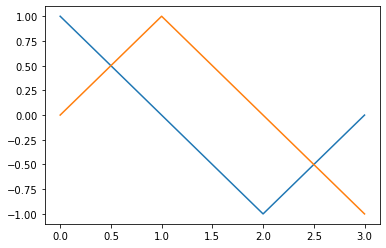

In [18]:
plt.plot([(1.0, 0.0),
              (0.0, 1.0),
              (-1.0, 0.0),
              (0.0, -1.0)])

---
- 2.Frechet distance
  - 정의 : @@@이미지넣기@@@  
  - 예시 :  
  - 유래 : 수학에서 곡선을 따라 점의 위치와 순서를 고려한 곡선 간의 유사도를 측정 한 것. '모리스 르네 프레셰'의 이름을 따서 명명됨
- 3.Discrete Frechet distance

# TODO
-multinomial 논문 +유튜브참고(시간복잡도)  
-프레셔 vs interpoint  
-FID -> 인셉션 모델이란? / FID 파이썬코드
-R이나 파이썬으로 구현?

---
# <참고>

[위키피디아](https://en.wikipedia.org/wiki/Fr%C3%A9chet_distance)  
[유튜브 : Frechet Distance Between Two Point Sets](https://www.youtube.com/watch?v=12vrDDBnEFg)  
[유튜브 : GAN 성능의 정량적 평가 방법 - Python, Deep Learning](https://www.youtube.com/watch?v=19An2T4utEM)


# <논문>
### 메인
[computing the frechet distance between polygonal curves](https://www.worldscientific.com/doi/abs/10.1142/S0218195995000064)
### 참고
[이산 프레셰 거리 척도를 이용한 궤적 유사도 고속계산 휴리스틱](http://www.dbpia.co.kr.ssl.openlink.ajou.ac.kr/search/topSearch?startCount=0&collection=ALL&range=A&searchField=ALL&sort=RANK&query=%EC%9D%B4%EC%82%B0+%ED%94%84%EB%A0%88%EC%85%B0&srchOption=*&includeAr=false)  
[다차원 프레셰 거리 기반 종단자료 군집분석](https://dcoll.ajou.ac.kr/dcollection/srch/srchDetail/000000030579)  
[대립생성망의 성능 비교에 대한 연구](https://www.dbpia.co.kr/Journal/articleDetail?nodeId=NODE07540262)  
[The Frechet Distance between Multivariate Normal Distributions](https://www.sciencedirect.com/science/article/pii/0047259X8290077X)  
[Interpoint distances: Applications, properties, and visualization](https://onlinelibrary.wiley.com/doi/abs/10.1002/asmb.2508)

### 개념
#### Hausdorff distance
[Hausdorff distance](https://progworks.tistory.com/72)  
[Hausdorff distance 개념](https://dhpark1212.tistory.com/entry/Hausdorff-Distance)  
[Template Matching](https://velog.io/@codren/%ED%85%9C%ED%94%8C%EB%A6%BF-%EB%A7%A4%EC%B9%AD)

# 대본참고
- 논문진행방식은 허성보님꺼 참고했다고함  
- 하려고하는배경(목적) / 해결하기 위한 방법론(장단점극복) /새로운 방법 제안  

- @@@위에것을를 발표 시작할때 지도교수,자랑스러운 후배의 논문 설명방식 + 밑의것을 참고하며 논문읽어보고 발표하는형식 

- ppt가 맞지만 계속 업데이트 될꺼같고, 실습을 추후에 r이나 파이썬으로 해보기 위해 그냥 마크다운으로 함  /마무리지을때 ppt로하겠다
- 발표 10분정도
- 템플릿매칭: 컴퓨터복수전공하시는분들이 많기에 opencv를 다뤄본분들이 많을것같은데, 원리 없이 사용했던 template matching에 하우스도르프 거리가 이용된다고합니다.
템플릿매칭은 입력영상에서 작은 크기의 템플릿 영상과 일치하는 부분을 찾는기법이고,한템플릿 마다 하기에 속도가 느리다는 단점이 있습니다.
하우스도르프 거리를 이용하여, 각템플릿에 대한 최소 하우스 도르프 거리를 갖는 이미지영역은 템플릿을 찾는데 가장 적합한 후보로 간주된다고합니다.  
-postgis : 활용 두번째는 지오스패이셜 데이터를 다루는 sql인 postgis에서 사용됩니다.
공간 쿼리를 다룰때,공간 위상관계에서 교차하는 객체를 찾아 객체간 거리를 산출하고, 거리값이 작을 수록 두 건물은 유사한 형상을 띕니다.
밑에 보시는 사진은 다른기준으로 측정된 건물들을 중첩했을때일치하지않지만
postgis에서 ST_HAusdorff distance함수를 실행했을때, 두 건물간의 거리를 산출하는 예시입니다.
데이터베이스를 현재수강하고있기에 잘 몰라서 넘어가겠습니다

-발표할때 오늘은 배경지식의 hausdorff까지만하겟다하기
